<a href="https://colab.research.google.com/github/RuwanPradeep0/Spam-Email-Detection-Data-mining-Project-/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Data Loading and Initial Exploration**

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')

In [ ]:
print("First few rows of the dataset:")
display(df.head())


First few rows of the dataset:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
print("\nNumber of duplicated rows:", df.duplicated().sum())
print("\nMissing values in each column:")
print(df.isnull().sum())


Number of duplicated rows: 403

Missing values in each column:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


# **Data Cleaning and Preparation**

**Rename columns**

In [ ]:
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

**Drop unnamed columns**

In [ ]:
df.drop(columns={'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'}, inplace=True)

**Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham'**

In [ ]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
df.head()

,Category,Message,Spam,Processed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think go usf life around though


**Data Preprocessing**

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Preprocessing function**

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    stop_words = set(stopwords.words("english"))
    return ' '.join(lemmatizer.lemmatize(word) for word in words if word not in stop_words)


**Apply preprocessing to the Message column**

In [ ]:
df['Processed_Message'] = df['Message'].apply(preprocess_text)

In [ ]:
df.head()

,Category,Message,Spam,Processed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think go usf life around though


# **Visualization**

**Spam vs Ham Distribution**

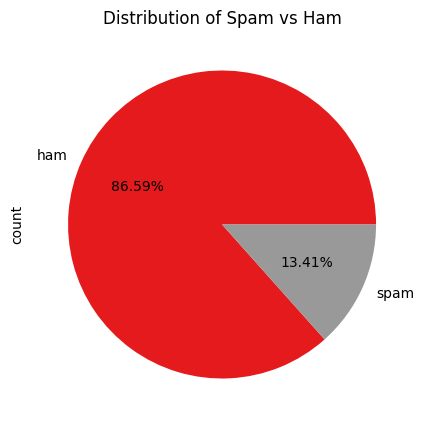

In [ ]:
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)
spread.plot(kind='pie', autopct='%1.2f%%', cmap='Set1')
plt.title('Distribution of Spam vs Ham')
plt.show()

# **Feature Engineering & Data Splitting**

**Splitting data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Message'], df['Spam'], test_size=0.25)

**Display training and test data summary**

In [ ]:
train_summary = pd.DataFrame({
    'Subset': ['X_train', 'y_train'],
    'Shape': [X_train.shape[0], y_train.shape[0]],
    'Spam Count': [y_train.sum(), y_train.sum()],
    'Non-Spam Count': [y_train.shape[0] - y_train.sum(), y_train.shape[0] - y_train.sum()]
})
test_summary = pd.DataFrame({
    'Subset': ['X_test', 'y_test'],
    'Shape': [X_test.shape[0], y_test.shape[0]],
    'Spam Count': [y_test.sum(), y_test.sum()],
    'Non-Spam Count': [y_test.shape[0] - y_test.sum(), y_test.shape[0] - y_test.sum()]
})
print("Training Data Summary:")
display(train_summary)
print("\nTesting Data Summary:")
display(test_summary)

Training Data Summary:


,Subset,Shape,Spam Count,Non-Spam Count
0,X_train,4179,568,3611
1,y_train,4179,568,3611



Testing Data Summary:


,Subset,Shape,Spam Count,Non-Spam Count
0,X_test,1393,179,1214
1,y_test,1393,179,1214


In [ ]:
# Train summary with additional statistics
train_summary = pd.DataFrame({
    'Subset': ['X_train', 'y_train'],
    'Shape': [X_train.shape[0], y_train.shape[0]],
    'Spam Count': [y_train.sum(), y_train.sum()],
    'Non-Spam Count': [y_train.shape[0] - y_train.sum(), y_train.shape[0] - y_train.sum()],
    'Null Values': [X_train.isnull().sum().sum(), y_train.isnull().sum()],

})

# Test summary with additional statistics
test_summary = pd.DataFrame({
    'Subset': ['X_test', 'y_test'],
    'Shape': [X_test.shape[0], y_test.shape[0]],
    'Spam Count': [y_test.sum(), y_test.sum()],
    'Non-Spam Count': [y_test.shape[0] - y_test.sum(), y_test.shape[0] - y_test.sum()],
    'Null Values': [X_test.isnull().sum().sum(), y_test.isnull().sum()],

})

# Display the summaries
print("Training Data Summary:")
display(train_summary)
print("\nTesting Data Summary:")
display(test_summary)


Training Data Summary:


,Subset,Shape,Spam Count,Non-Spam Count,Null Values
0,X_train,4179,568,3611,0
1,y_train,4179,568,3611,0



Testing Data Summary:


,Subset,Shape,Spam Count,Non-Spam Count,Null Values
0,X_test,1393,179,1214,0
1,y_test,1393,179,1214,0


**Evaluation Function**

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)
    fpr_train, tpr_train, _ = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    sns.heatmap(cm_train, annot=True, cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_title("Train Confusion Matrix")
    sns.heatmap(cm_test, annot=True, cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_title("Test Confusion Matrix")
    plt.tight_layout()
    plt.show()
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    print(pd.DataFrame(cr_train).T)
    print("\nTest Classification Report:")
    print(pd.DataFrame(cr_test).T)
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']
    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test]
    return model_score


# **ML Model - Multinomial Naive Bayes**

**Create a pipeline for vectorization and model training**

In [ ]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

**Evaluate the model**


Train ROC AUC: 0.9857870220492159
Test ROC AUC: 0.9543938041287402


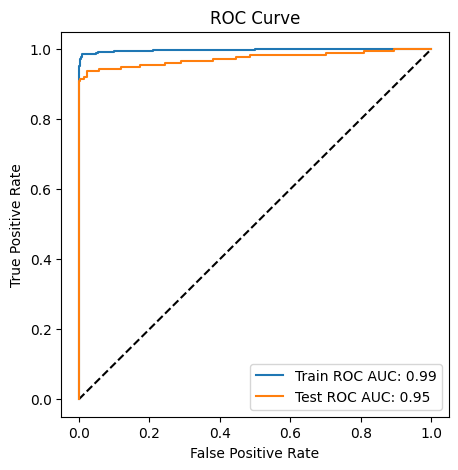

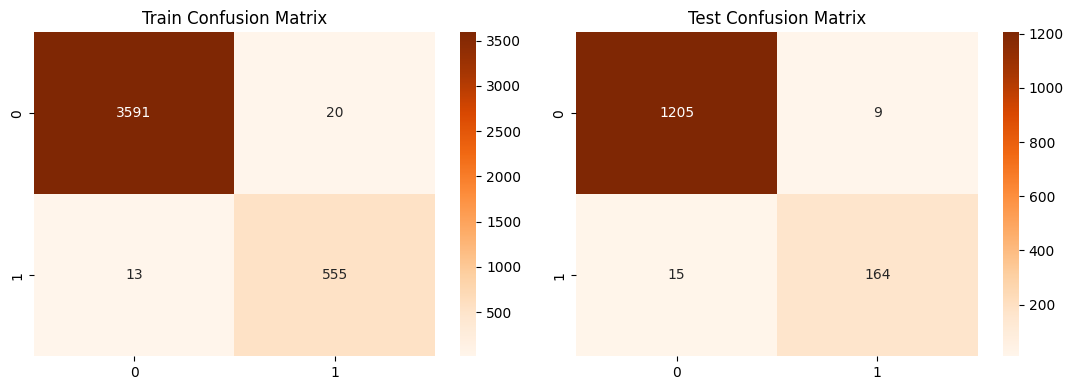


Train Classification Report:
              precision    recall  f1-score      support
0              0.996393  0.994461  0.995426  3611.000000
1              0.965217  0.977113  0.971129   568.000000
accuracy       0.992103  0.992103  0.992103     0.992103
macro avg      0.980805  0.985787  0.983277  4179.000000
weighted avg   0.992156  0.992103  0.992124  4179.000000

Test Classification Report:
              precision    recall  f1-score      support
0              0.987705  0.992586  0.990140  1214.000000
1              0.947977  0.916201  0.931818   179.000000
accuracy       0.982771  0.982771  0.982771     0.982771
macro avg      0.967841  0.954394  0.960979  1393.000000
weighted avg   0.982600  0.982771  0.982645  1393.000000


In [ ]:
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

**Email Spam Detection Function**

In [ ]:
def detect_spam(email_text):
    prediction = clf.predict([email_text])
    return "This is a Spam Email!" if prediction == 1 else "This is a Ham Email!"

**Test the function with a sample email**

In [ ]:
sample_email = ' do you need  10000$ gift price'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!
